# Machine Learning - IDA Exam Project
## Project 4: Credit

Prasetyo, Sezi Dwi Sagarianti - 799930
### Problem Description
1. a Bank want to classify their customer to creditworthy or uncreditworthy customer
2. There are 1000 Data Points and 21 Columns (11 categorical columns and 10 numeric columns)
3. 4 columns have missing values with '?' symbol on it. Fill this missing value using linear classification
4. Fit a model to classify these customers
5. Evaluate the models and choose the best models based on bank cost's model

# Prepare the Data

In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression

# load data 
df = pd.read_csv("dataset.csv", header=0)

df.dropna()

,name,totalOrders,supplierConfirmRate,group,active
0,Wona Toti,73.0,42%,B,1.0
1,Fija Tiro,78.0,94%,B,1.0
2,Jedi Kihu,0.0,0%,C,0.0
3,Rere Jiko,31.0,87%,B,1.0
4,Nare Joru,56.0,95%,B,1.0
5,Fanu Fewo,60.0,86%,A,0.0
6,Nafu Hato,27.0,95%,A,0.0
7,Taho Wunu,60.0,98%,B,1.0
8,Taja Dora,55.0,96%,B,1.0
9,Jeto Nefo,81.0,96%,A,1.0


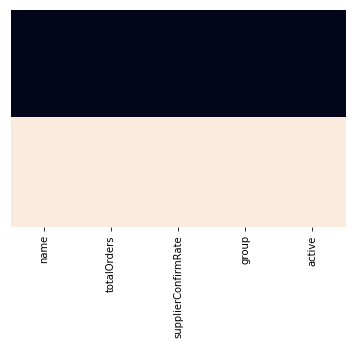

In [13]:
#df=df.replace('?', np.NaN)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

## Handle Missing Values
Purpose, employement duration,job, and is foreign worker.
We will replace the empty value with linear classification model

In [1740]:
def replaceEmptyColumnWithClassifier(column):
    
    missing_column = ['purpose', 'employement_duration', 'job', 'is_foreign','credit_worthy']
    X_variables = df.copy()
    X_variables = X_variables.drop(missing_column, axis=1)
    
    nan_index = df.loc[lambda x: x[column].isnull() == True].index.values
    X_variables_topredict = X_variables.iloc[nan_index]
    
    not_nan_index = df.loc[lambda x: x[column].isnull() == False].index.values
    X_variables_train = X_variables.iloc[not_nan_index]
    y_variables_train = df[column].iloc[not_nan_index]
    
    
    categorical_column_to_encode = ['checking_account_status',
                'credit_history',
                'saving_account',
                'gender_status', 
                'other_debtors', 
                'property', 
                'installment_plans', 
                'housing',
                'telephone']
    
    X_variables_train = pd.get_dummies(X_variables_train, columns= categorical_column_to_encode)
    X_variables_topredict = pd.get_dummies(X_variables_topredict, columns= categorical_column_to_encode)
    
    prediction_model = LogisticRegression()
    

    prediction_model.fit(X_variables_train, y_variables_train)
    
    
    y_pred_train = prediction_model.predict(X_variables_train)
    print("Accuracy: {}".format(metrics.accuracy_score(y_variables_train, y_pred_train)))
    
    Score = cross_val_score(prediction_model, X_variables_train, y_variables_train, cv=5).mean()
    print("Cross Validation: {}".format(Score))
    
    y_pred = prediction_model.predict(X_variables_topredict)
    df.at[X_variables_topredict.index.values, column] = y_pred

### 1. Purpose

In [1741]:
replaceEmptyColumnWithMostOccuredData('purpose')

Accuracy: 0.42321644498186217
Cross Validation: 0.3481566335872358


### 2. Employement duration

In [1742]:
replaceEmptyColumnWithMostOccuredData('employement_duration')

Accuracy: 0.498015873015873
Cross Validation: 0.3790942543711824


### 3. Job

In [1743]:
replaceEmptyColumnWithMostOccuredData('job')

Accuracy: 0.6857887874837028
Cross Validation: 0.6533273228319667


### 4. Foreign Worker

In [1744]:
replaceEmptyColumnWithMostOccuredData('is_foreign')

Accuracy: 0.9625
Cross Validation: 0.95626001419154


Now All Missing Datas Are prefiiled!

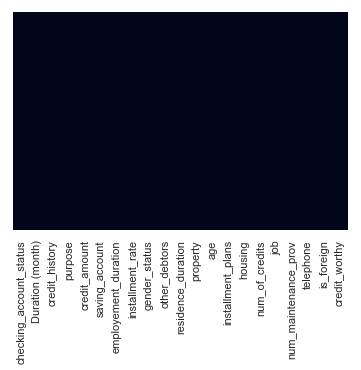

In [1745]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

set boolean data to 0 and 1

In [1746]:
df['credit_worthy'] =  np.where(df['credit_worthy'] == 2, 0, 1)

In [1747]:
df['is_foreign'] = np.where(df['is_foreign'] == 'A202', 0, 1)

In [1748]:
df['telephone'] = np.where(df['telephone'] == 'A191', 0, 1)

Make the table value more readable

In [1749]:
categorical_columns =  {
    'checking_account_status':{
        'A11':"<0 EUR", 
        'A12': "0-200 EUR",
        'A13':">= 200 EUR",
        'A14':"none"
        },
     'credit_history':{
        "A30":"no credits taken",
        "A31":"all credits at this bank paid back duly",
        "A32":"existing credits paid back duly till now",
        "A33":"delay in paying off in the past",
        "A34":"critical account"
         },
     'purpose':{
        "A40" : "car (new)",
        "A41" : "car (used)",
        "A42" : "furniture/equipment",
        "A43" :"radio/television" ,
        "A44" : "domestic appliances",
        "A45" : "repairs",
        "A46" : "education",
        'A47' : 'vacation',
        'A48' : 'retraining',
        'A49' : 'business',
        'A410' : 'others'
         },
    'saving_account' : {
        "A61" : "<100 EUR",
        "A62" : "100-500 EUR",
        "A63" : "500-1000 EUR",
        "A64" : ">= 1000 EUR",
        "A65" : "none"
        },
    'employement_duration' : {
        'A71': "unemployed",
        'A72': "<1 years",
        'A73': "1-4 years",
        'A74': "4-7 years",
        'A75': ">=7 years"
        },
    'gender_status' : { 
        'A91':"male:divorced/separated",
        'A92':"female:divorced/separated/married",
        'A93':"male:single",
        'A94':"male:married/widowed",
        'A95':"female:single"
        },
    'other_debtors' : {
         'A101':"none",
         'A102':"co-applicant",
         'A103':"guarantor"
         },
    'property' : {
        'A121':"real estate",
        'A122':"savings agreement/life insurance",
        'A123':"car or other",
        'A124':"unknown / no property"
        },
    'installment_plans' : {
         'A141':"bank",
         'A142':"store",
         'A143':"none"
         },
    'housing' : {
        'A151':"rent",
        'A152':"own",
        'A153':"for free"
        },
    'job' : {
        'A171':"unemployed/ unskilled  - non-resident",
        'A172':"unskilled - resident",
        'A173':"skilled employee / official",
        'A174':"management/ highly qualified employee"
        }
    }
    
for column, value in categorical_columns.items():
    df[column]=df[column].map(value)

In [1750]:
df.head()

,checking_account_status,Duration (month),credit_history,purpose,credit_amount,saving_account,employement_duration,installment_rate,gender_status,other_debtors,...,property,age,installment_plans,housing,num_of_credits,job,num_maintenance_prov,telephone,is_foreign,credit_worthy
0,0-200 EUR,18,existing credits paid back duly till now,education,1239,none,1-4 years,4,male:single,none,...,unknown / no property,61,none,for free,1,skilled employee / official,1,0,1,1
1,>= 200 EUR,24,existing credits paid back duly till now,car (new),947,<100 EUR,4-7 years,4,male:single,none,...,unknown / no property,38,bank,for free,1,skilled employee / official,2,0,1,0
2,none,15,delay in paying off in the past,radio/television,1478,<100 EUR,1-4 years,4,male:married/widowed,none,...,real estate,33,bank,own,2,skilled employee / official,1,0,1,1
3,none,24,existing credits paid back duly till now,car (new),1525,>= 1000 EUR,4-7 years,4,female:divorced/separated/married,none,...,car or other,34,none,own,1,skilled employee / official,2,1,1,1
4,0-200 EUR,24,critical account,car (new),3878,100-500 EUR,1-4 years,4,male:divorced/separated,none,...,car or other,37,none,own,1,skilled employee / official,1,1,1,1


In [1751]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 21 columns):
checking_account_status    999 non-null object
Duration (month)           999 non-null int64
credit_history             999 non-null object
purpose                    999 non-null object
credit_amount              999 non-null int64
saving_account             999 non-null object
employement_duration       999 non-null object
installment_rate           999 non-null int64
gender_status              999 non-null object
other_debtors              999 non-null object
residence_duration         999 non-null int64
property                   999 non-null object
age                        999 non-null int64
installment_plans          999 non-null object
housing                    999 non-null object
num_of_credits             999 non-null int64
job                        999 non-null object
num_maintenance_prov       999 non-null int64
telephone                  999 non-null int64
is_foreign

## Data Visualization
exploring data set

Target Variable Distribution

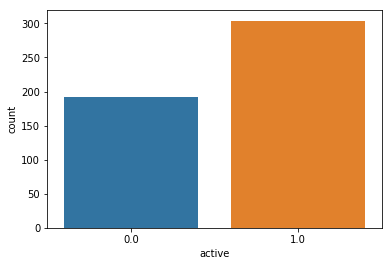

In [3]:
sns.countplot('active', data = df)

we could see from the distribution above, that the occurence of positive result are quite high 

Categorical Data

In [9]:
import matplotlib
import matplotlib.pyplot as plt

def calculate_ratio(column):
    distinct_values = df[column].unique()

    d = pd.DataFrame(columns = distinct_values)
    for value in enumerate(distinct_values):
        total = df[column].value_counts()[value]
        l = list()
        for i in range(0,2):
            part =df[df.active==i][column].value_counts()[value]
            l.append(part/total)
        d[value] = l

    return d

def show_countplot_by_target(column):
    plt.figure()
    ax = sns.countplot(column, hue= 'active' , data = df )
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()
        
def show_countplot(column):
    plt.figure()
    ax1 = sns.countplot(column, data = df )
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()
    plt.show()

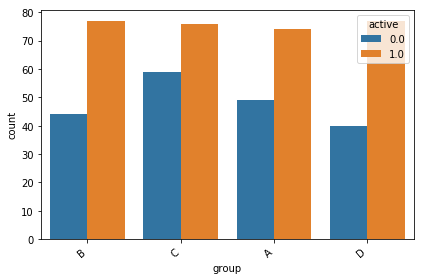

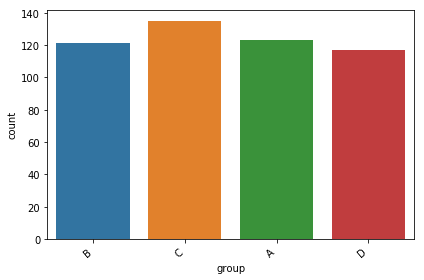

In [11]:
    #'installment_plans' 
    #display(calculate_ratio('group'))
    show_countplot_by_target('group')
    show_countplot('group')

The range ratio between 'None' and other type of installment plans are really large

Numerical Data

In [1755]:
numerical_columns = [
            'Duration (month)',
            'credit_amount',
            'installment_rate',
            'residence_duration',
            'age',
            'num_of_credits',
            'num_maintenance_prov',
            'telephone',
            'is_foreign']

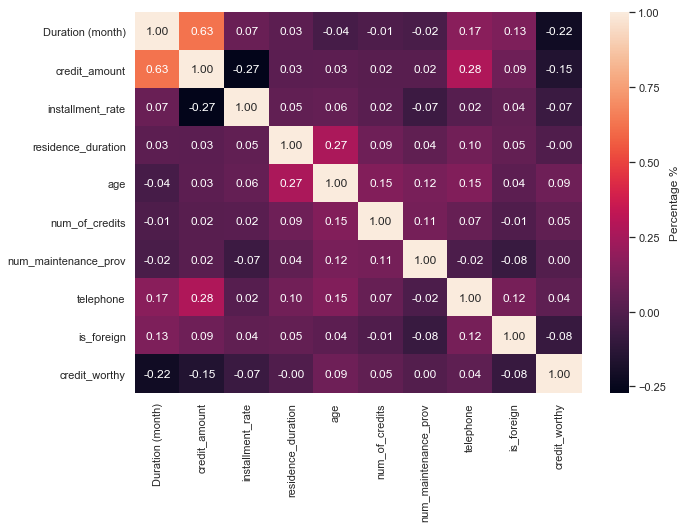

In [1756]:
corr = df.corr()
num,ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True, fmt=".2f",cbar_kws={'label': 'Percentage %'}, ax= ax)

residence_duration, num_maintenance_prov, and telephone have low correlation with credit_worthy

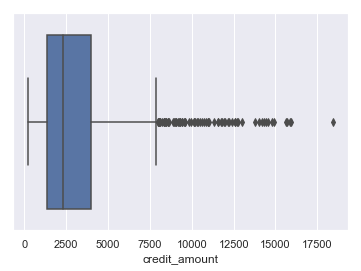

In [1757]:
#'credit_amount'
plt.figure()
sns.boxplot( x = 'credit_amount', data = df)

 credit amount has many outliers

### Analysis Result
based on analysis these are columns that could be eliminated because the number of instances comparison are too low, or the correlation between independent variables and target variable is low

- installment_plans: bank, store
- residence duration
- num_maintenance_prov
- telephone

In [1758]:
removed_columns = [
'installment_plans_bank',
'installment_plans_store',
'residence_duration',
'num_maintenance_prov',
'telephone']


### Handling Outliers

In [1759]:
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("Q3: {}".format(Q3['credit_amount']))
index_of_outliers = df[df['credit_amount'] > (Q3['credit_amount'] + 1.5 * IQR['credit_amount'])].index.values
df.at[index_of_outliers, 'credit_amount'] = Q3['credit_amount']

Q3: 3972.5


## Split data to Train and Test

In [1760]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(df.loc[:, 'checking_account_status':'is_foreign' ], df.loc[:,["credit_worthy"]],test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)

(799, 20) (799, 1)


We will train the model with both raw data (no feature selection) and Analysis Result datas (with features selection). Since there are several categorical datas, we need to encode it to numerical before fit in to the model

In [1761]:
X_train_raw=X_train.copy()
X_train_raw = pd.get_dummies(X_train_raw, columns= list(categorical_columns.keys()))
X_test_raw=X_test.copy()
X_test_raw = pd.get_dummies(X_test_raw, columns= list(categorical_columns.keys()))

In [1762]:
X_train_AR=X_train.copy()
X_train_AR = pd.get_dummies(X_train_AR, columns= list(categorical_columns.keys()))
X_test_AR = X_test.copy()
X_test_AR = pd.get_dummies(X_test_AR, columns= list(categorical_columns.keys()))

X_train_AR = X_train_AR.drop(removed_columns, axis=1)
X_test_AR = X_test_AR.drop(removed_columns, axis=1)


# Fit The Model
I will use:
- logistic regression
- random forest
- decision tree
- gradient boosting

In [1763]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 

random_forest = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
logistic_regression = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10, random_state=42)
gradboost_clf = GradientBoostingClassifier(max_depth=5, random_state=42)

model_classifier = {
    "random_forest" : random_forest,
    "logistic_regression" : logistic_regression,
    "decision_tree" : decision_tree,
    "gradient_boosting" : gradboost_clf
}

below is the fitting model and test. And some score comparison.

In [1764]:
from sklearn.metrics import roc_auc_score, confusion_matrix, average_precision_score, fbeta_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def run_classification(X_train_data, X_test_data, y_train_data, y_test_data, typeName):
    Results = pd.DataFrame(columns = ['Model', 'CV(5)', 'Accuracy', 'Precision_score', 'Recall_score','F1_score','Fbeta_score'])
    for model, model_name in zip(model_classifier.values(), model_classifier.keys()):
        y_train_arr, y_test_arr=y_train_data['credit_worthy'].values, y_test_data['credit_worthy'].values
        
        model.fit(X_train_data, y_train_arr)
        y_pred = model.predict(X_test_data)
        y_score = model.predict_proba(X_test_data)[:,1]
        
        X_datas = pd.concat([X_train_data, X_test_data])
        y_datas = pd.concat([y_train_data, y_test_data])['credit_worthy'].values
        Score = cross_val_score(model, X_datas, y_datas, cv=5).mean()
        
    
       
        t = pd.Series({ 
                         'Model': typeName + "_" + model_name,
                         'CV(5)': Score,
                         'Accuracy': metrics.accuracy_score(y_test_arr, y_pred),
                         'Precision_score': metrics.precision_score(y_test_arr, y_pred),
                         'Recall_score': metrics.recall_score(y_test_arr, y_pred),                    
                         'F1_score': metrics.f1_score(y_test_arr, y_pred),
                         'Fbeta_score': metrics.fbeta_score(y_test_arr, y_pred,beta=0.5)
                     })

        Results = Results.append(t,ignore_index = True)
    return Results

## Raw Datas

In [1765]:
raw_results = run_classification(X_train_raw, X_test_raw, y_train, y_test, "RAW")
raw_results

,Model,CV(5),Accuracy,Precision_score,Recall_score,F1_score,Fbeta_score
0,RAW_random_forest,0.728719,0.730,0.743169,0.951049,0.834356,0.777143
1,RAW_logistic_regression,0.753714,0.715,0.786667,0.825175,0.805461,0.794078
2,RAW_decision_tree,0.687678,0.715,0.816176,0.776224,0.795699,0.807860
3,RAW_gradient_boosting,0.755719,0.755,0.813333,0.853147,0.832765,0.820996


## Analysis result Datas

In [1766]:
Results_AR = run_classification(X_train_AR, X_test_AR, y_train, y_test, "AR")
Results_AR

,Model,CV(5),Accuracy,Precision_score,Recall_score,F1_score,Fbeta_score
0,AR_random_forest,0.735709,0.725,0.736559,0.958042,0.832827,0.772266
1,AR_logistic_regression,0.752698,0.720,0.784314,0.839161,0.810811,0.794702
2,AR_decision_tree,0.693709,0.710,0.819549,0.762238,0.789855,0.807407
3,AR_gradient_boosting,0.756734,0.735,0.796053,0.846154,0.820339,0.805593


## Model Comparison

In [1767]:
Final_result = pd.concat([raw_results, Results_AR])

### 1) Accuracy

In [1768]:
Final_result[['Model', 'Accuracy']].sort_values(by=['Accuracy'], ascending=False)

,Model,Accuracy
3,RAW_gradient_boosting,0.755
3,AR_gradient_boosting,0.735
0,RAW_random_forest,0.730
0,AR_random_forest,0.725
1,AR_logistic_regression,0.720
1,RAW_logistic_regression,0.715
2,RAW_decision_tree,0.715
2,AR_decision_tree,0.710


### 2) Precision

In [1769]:
Final_result[['Model', 'Precision_score']].sort_values(by=['Precision_score'], ascending=False)

,Model,Precision_score
2,AR_decision_tree,0.819549
2,RAW_decision_tree,0.816176
3,RAW_gradient_boosting,0.813333
3,AR_gradient_boosting,0.796053
1,RAW_logistic_regression,0.786667
1,AR_logistic_regression,0.784314
0,RAW_random_forest,0.743169
0,AR_random_forest,0.736559


### 3) Recall

In [1770]:
Final_result[['Model', 'Recall_score']].sort_values(by=['Recall_score'], ascending=False)

,Model,Recall_score
0,AR_random_forest,0.958042
0,RAW_random_forest,0.951049
3,RAW_gradient_boosting,0.853147
3,AR_gradient_boosting,0.846154
1,AR_logistic_regression,0.839161
1,RAW_logistic_regression,0.825175
2,RAW_decision_tree,0.776224
2,AR_decision_tree,0.762238


### 4) Weighted Average Precision and Recall

In [1771]:
Final_result[['Model', 'F1_score']].sort_values(by=['F1_score'], ascending=False)

,Model,F1_score
0,RAW_random_forest,0.834356
0,AR_random_forest,0.832827
3,RAW_gradient_boosting,0.832765
3,AR_gradient_boosting,0.820339
1,AR_logistic_regression,0.810811
1,RAW_logistic_regression,0.805461
2,RAW_decision_tree,0.795699
2,AR_decision_tree,0.789855


### 5) Cross Validation ( 5 folds )

In [1772]:
Final_result[['Model', 'CV(5)']].sort_values(by=['CV(5)'], ascending=False)

,Model,CV(5)
3,AR_gradient_boosting,0.756734
3,RAW_gradient_boosting,0.755719
1,RAW_logistic_regression,0.753714
1,AR_logistic_regression,0.752698
0,AR_random_forest,0.735709
0,RAW_random_forest,0.728719
2,AR_decision_tree,0.693709
2,RAW_decision_tree,0.687678


## Evaluation Notes
- Datas With some feature selection from Analysis result does not give much difference with raw datas
- Gradient Boosting gives best accuracy with 75%
- In terms Of Precision Decision tree gives the best score with almost 82%
- In terms of Recall Random Forest giving really good result with 95%
- The F1 Score have random forest as the best score with 83% (because the recall is really high)
- In terms of cross validation, where it should give better evaluation cause it iterrates over all datas, Gradient Boosting give highest score with 75%

### Which one is the best suitable model for this case?
In this case, where a bank have to predict whether the customer is creditworthy or not it is more crucial to predict the right classification, which means have as many True Positive from all prediction (precision) is more important than predict True Positive from all actual Positive (recall). Because the bank will have problem with the customer if it predict the wrong classification. But does not mean we will neglect recall at all. So to choose the best model I will look from the F score but give more weighting to the precision score.


### Weighted average biased to precision

In [1773]:
Final_result[['Model', 'Fbeta_score']].sort_values(by=['Fbeta_score'], ascending=False)

,Model,Fbeta_score
3,RAW_gradient_boosting,0.820996
2,RAW_decision_tree,0.807860
2,AR_decision_tree,0.807407
3,AR_gradient_boosting,0.805593
1,AR_logistic_regression,0.794702
1,RAW_logistic_regression,0.794078
0,RAW_random_forest,0.777143
0,AR_random_forest,0.772266


From Above Result, the best Model for this case would be Gradient Boosting

# Thank You